<a href="https://colab.research.google.com/github/KomilovQobiljon/AIApplicationCourse/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./pt_data/cifar-10-python.tar.gz to ./pt_data
Category:  8


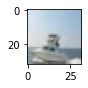

In [1]:
import torchvision 
import torchvision.transforms as transforms 
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader 
import numpy as np 
import matplotlib.pyplot as plt

# Load training dataset into a single batch. 
transform = transforms.Compose([transforms.ToTensor()]) 
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform) 
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False) 
data = next(iter(trainloader)) 
# Convert to numpy arrays of correct shape for plotting. 
train_images = data[0].numpy() 
train_images = np.moveaxis(train_images, 1, 3) 
train_labels = data[1].numpy()

print('Category: ', train_labels[100]) 
plt.figure(figsize=(1, 1)) 
plt.imshow(train_images[100]) 
plt.show() 

In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests 
url='https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r=requests.get(url)

with open('utilities.py','w') as f:
  f.write(r.text)

In [4]:
import torch 
import torch.nn as nn 
import torchvision 
import torchvision.transforms as transforms 
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader 
import numpy as np 
from utilities import train_model 
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu") 
EPOCHS = 128 
BATCH_SIZE = 32 
# Load training dataset into a single batch to compute mean and stddev. 
transform = transforms.Compose([transforms.ToTensor()]) 
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform) 
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False) 
data = next(iter(trainloader)) 
mean = data[0].mean() 
stddev = data[0].std()

Files already downloaded and verified


In [6]:
transform=transforms.Compose( 
    [transforms.ToTensor(),
     transforms.Normalize(mean,stddev)])

trainset = CIFAR10(root='./pt_data', train=True, download=True,transform=transform) 
testset = CIFAR10(root='./pt_data', train=False, download=True,transform=transform)


model = nn. Sequential(
    nn.Conv2d(3, 64, 5, stride=2, padding=2),
    nn.ReLU(),
    nn. Conv2d(64, 64, 3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear (64*8*8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
layers = next (model.modules())
conv_layer0=layers[0]

conv_layer1=layers[2]

output_layer=layers[5]


nn.init.kaiming_normal_(conv_layer0.weight)

nn.init.constant(conv_layer0.bias,0.0)

nn.init.kaiming_normal_(conv_layer1.weight)

nn.init.constant (conv_layer1.bias, 0.0)

nn. init.xavier_uniform (output_layer.weight)

nn.init.constant (output_layer.bias, 0.0)

optimizer = torch.optim.Adam(model.parameters()) 
loss_function = nn.CrossEntropyLoss()

train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


Epoch 1/128 loss: 1.4003 - acc: 0.5075 - val_loss: 1.1637 - val_acc: 0.5896
Epoch 2/128 loss: 1.0538 - acc: 0.6336 - val_loss: 1.0559 - val_acc: 0.6280
Epoch 3/128 loss: 0.9026 - acc: 0.6867 - val_loss: 1.0165 - val_acc: 0.6517
Epoch 4/128 loss: 0.7931 - acc: 0.7226 - val_loss: 1.0032 - val_acc: 0.6563
Epoch 5/128 loss: 0.7132 - acc: 0.7506 - val_loss: 1.0260 - val_acc: 0.6592
Epoch 6/128 loss: 0.6441 - acc: 0.7745 - val_loss: 1.0931 - val_acc: 0.6513
Epoch 7/128 loss: 0.5826 - acc: 0.7961 - val_loss: 1.1312 - val_acc: 0.6517
Epoch 8/128 loss: 0.5320 - acc: 0.8128 - val_loss: 1.1979 - val_acc: 0.6524
Epoch 9/128 loss: 0.4886 - acc: 0.8278 - val_loss: 1.2423 - val_acc: 0.6478
Epoch 10/128 loss: 0.4459 - acc: 0.8403 - val_loss: 1.3255 - val_acc: 0.6472
Epoch 11/128 loss: 0.4079 - acc: 0.8555 - val_loss: 1.4390 - val_acc: 0.6342
Epoch 12/128 loss: 0.3714 - acc: 0.8657 - val_loss: 1.5624 - val_acc: 0.6328
Epoch 13/128 loss: 0.3518 - acc: 0.8735 - val_loss: 1.6265 - val_acc: 0.6383
Epoch 14

KeyboardInterrupt: ignored